In [1]:
import os
pwd=os.getcwd()
path=os.path.join(pwd,'dataset').replace('\\','/')
filepath=os.path.join(path,'brain_tumor_dataset').replace('\\','/')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', message='The name tf.losses.sparse_softmax_cross_entropy is deprecated.*')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil
import matplotlib.image as mpimg
import seaborn as sns
plt.style.use('ggplot')

In [3]:

folder = os.path.join(filepath, 'no/').replace('\\', '/')
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" + str(count) + ".jpg"
    if not os.path.exists(destination):  # Check if the destination file already exists
        os.rename(source, destination)
        count += 1

print("All files are renamed in the No")

# Renaming files in the 'yes' folder
folder = os.path.join(filepath, 'yes/').replace('\\', '/')
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" + str(count) + ".jpg"
    if not os.path.exists(destination):  # Check if the destination file already exists
        os.rename(source, destination)
        count += 1

print("All files are renamed in the yes")

All files are renamed in the No
All files are renamed in the yes


Exploratory Data Analysis

In [4]:
brain_tumor_data_yes=os.path.join(filepath,'yes/').replace('\\','/')
listyes=os.listdir(brain_tumor_data_yes)
number_files_yes=len(listyes)
print(number_files_yes)

brain_tumor_data_no=os.path.join(filepath,'no/').replace('\\','/')
listno=os.listdir(brain_tumor_data_no)
number_files_no=len(listno)
print(number_files_no)


155
98


In [5]:
# Plot

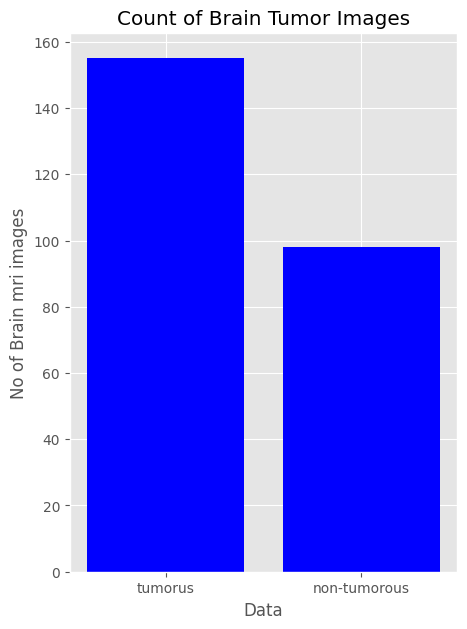

In [6]:
data={'tumorus':number_files_yes,'non-tumorous':number_files_no}
types=data.keys()
values=data.values()
fig=plt.figure(figsize=(5,7))
plt.bar(types,values,color="blue")
plt.xlabel("Data")
plt.ylabel("No of Brain mri images")
plt.title("Count of Brain Tumor Images")
plt.show()


In [7]:
#Data Augmentation

In [8]:
#155(61%),98(39%)
#imbalance

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [10]:
#N,width,height,channel

In [11]:
def timing(sec_elapsed):
    h=int(sec_elapsed/(60*60))
    m=int(sec_elapsed%(60*60)/60)
    s=sec_elapsed%60
    
    return f"{h}:{m}:{s}"

In [12]:
def augmented_data(file_dir,n_generated_samples,save_to_dir):
    data_gen=ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3,0.1),
                      horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image=cv2.imread(file_dir+'/'+filename)
        image=image.reshape((1,)+image.shape)
        save_prefix='aug_'+filename[:-4]
        i=0
        for batch in data_gen.flow(x=image,batch_size=1,save_to_dir=save_to_dir,save_prefix=save_prefix,save_format="jpg"):
            i+=1
            if i>n_generated_samples:
                break
        

In [13]:
import time
start_time=time.time()
augmented_data_path=os.path.join(pwd,'dataset/augmented_data/').replace('\\','/')
augmented_data(file_dir=brain_tumor_data_yes,n_generated_samples=6,save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir=brain_tumor_data_no,n_generated_samples=9,save_to_dir=augmented_data_path+'no')
end_time=time.time()
execution_time=end_time-start_time
print(timing(execution_time))

0:1:15.021972179412842


In [14]:
def data_summary(main_path):
    yes_path=brain_tumor_data_yes
    no_path=brain_tumor_data_no
    
    m_pos=len(os.listdir(yes_path))
    m_neg=len(os.listdir(no_path))    
    
    m=(m_pos +m_neg)
    pos_per=(m_pos*100)/m
    neg_per=(m_neg*100)/m
    
    print(f"No of sample {m}")
    print(f"{m_pos}No of positive sample in percentage {pos_per}%")
    print(f"{m_neg}No of negative sample in percentage {neg_per}%")    

In [15]:
data_summary(augmented_data_path)

No of sample 253
155No of positive sample in percentage 61.26482213438735%
98No of negative sample in percentage 38.73517786561265%


4337
3913


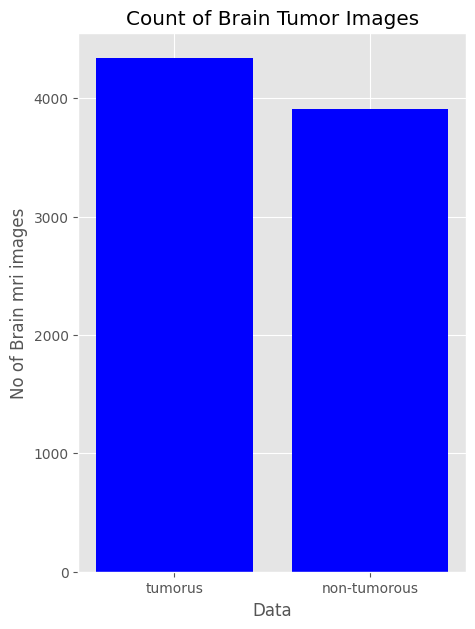

In [16]:
brain_tumor_data_yes=os.path.join(augmented_data_path,'yes/').replace('\\','/')
listyes=os.listdir(brain_tumor_data_yes)
number_files_yes=len(listyes)
print(number_files_yes)

brain_tumor_data_no=os.path.join(augmented_data_path,'no/').replace('\\','/')
listno=os.listdir(brain_tumor_data_no)
number_files_no=len(listno)
print(number_files_no)
data={'tumorus':number_files_yes,'non-tumorous':number_files_no}
types=data.keys()
values=data.values()
fig=plt.figure(figsize=(5,7))
plt.bar(types,values,color="blue")
plt.xlabel("Data")
plt.ylabel("No of Brain mri images")
plt.title("Count of Brain Tumor Images")
plt.show()


In [17]:
#Data Preprocessing

In [18]:
#Convert BGR to GRAV
#GaussianBLUR
#Threshold
#Erode
#Dilate
#Find Contours

In [19]:
import imutils

In [20]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    
    if plot:
        plt.figure()
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(thres, cmap='gray')
        plt.title('Thresholded Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.axis('off')
        
        plt.show()
    
    return new_image


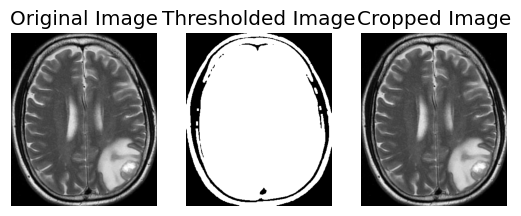

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [21]:
sample_path=os.path.join(augmented_data_path,'yes/aug_Y_10_0_2210.jpg').replace('\\','/')
img=cv2.imread(sample_path)
crop_brain_tumor(img,True)

In [22]:
augmented_data_path
augmented_yes=os.path.join(augmented_data_path,'yes').replace('\\','/')
augmented_no=os.path.join(augmented_data_path,'no').replace('\\','/')

In [23]:
folder1=augmented_no
folder2=augmented_yes

for filename in os.listdir(folder1):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        img_path = os.path.join(folder1, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = crop_brain_tumor(img, False)
            cv2.imwrite(os.path.join(folder1, filename), img)
        else:
            print("Error reading:", img_path)


for filename in os.listdir(folder2):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        img_path = os.path.join(folder2, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = crop_brain_tumor(img, False)
            cv2.imwrite(os.path.join(folder2, filename), img)
        else:
            print("Error reading:", img_path)

In [24]:
from sklearn.utils import shuffle
def load_data(dir_list,image_size):
    X=[]
    y=[]
    image_width,image_height=image_size
    for directory in dir_list:
        for filename in os.listdir(directory):
            image=cv2.imread(directory +'/'+filename)
            image=crop_brain_tumor(image,plot=False)
            image=cv2.resize(image,dsize=(image_width,image_height),interpolation=cv2.INTER_CUBIC)
            image=image/255.00
            X.append(image)
            if directory[-3:]=="yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    X,y=shuffle(X,y)
    print(f"Number of example is {len(X)}")
    print(f"X SHAPE is {X.shape}")
    print(f"Y SHAPE is {y.shape}")
    return X,y

In [25]:
IMAGE_WIDTH,IMAGE_HEIGHT=(240,240)
X,y =load_data([augmented_yes,augmented_no],(IMAGE_WIDTH,IMAGE_HEIGHT))

Number of example is 8250
X SHAPE is (8250, 240, 240, 3)
Y SHAPE is (8250,)


In [26]:
#Data splitting

In [27]:
base_dir_path=os.path.join(path,'tumorous_and_nontumorous').replace('\\','/')

In [28]:
if not os.path.isdir(base_dir_path):
    base_dir=base_dir_path
    os.mkdir(base_dir)

In [29]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir=os.path.join(base_dir,'train').replace('\\','/')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir=os.path.join(base_dir,'test').replace('\\','/')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir=os.path.join(base_dir,'valid').replace('\\','/')
    os.mkdir(valid_dir)

In [30]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir=os.path.join(train_dir,'tumorous').replace('\\','/')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir=os.path.join(train_dir,'nontumorous').replace('\\','/')
    os.mkdir(healthy_train_dir)
    
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir=os.path.join(test_dir,'tumorous').replace('\\','/')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir=os.path.join(test_dir,'nontumorous').replace('\\','/')
    os.mkdir(healthy_test_dir)
    
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir=os.path.join(valid_dir,'tumorous').replace('\\','/')
    os.mkdir(infected_valid_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir=os.path.join(valid_dir,'nontumorous').replace('\\','/')
    os.mkdir(healthy_valid_dir)

In [31]:
original_dataset_tumorous=os.path.join(augmented_data_path,"yes/").replace('\\','/')
original_dataset_nontumorous=os.path.join(augmented_data_path,"no/").replace('\\','/')

In [32]:
files=os.listdir(original_dataset_tumorous)
fnames=[]
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_tumorous,fname).replace('\\','/')
    dst=os.path.join(infected_train_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [33]:
files=os.listdir(original_dataset_tumorous)
fnames=[]
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_tumorous,fname).replace('\\','/')
    dst=os.path.join(infected_test_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [34]:
files=os.listdir(original_dataset_tumorous)
fnames=[]
for i in range(922,1085):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_tumorous,fname).replace('\\','/')
    dst=os.path.join(infected_valid_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [35]:
len(infected_train_dir)

102

In [36]:
files=os.listdir(original_dataset_nontumorous)
fnames=[]
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_nontumorous,fname).replace('\\','/')
    dst=os.path.join(healthy_train_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [37]:
files=os.listdir(original_dataset_nontumorous)
fnames=[]
for i in range(686,833):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_nontumorous,fname).replace('\\','/')
    dst=os.path.join(healthy_test_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [38]:
files=os.listdir(original_dataset_nontumorous)
fnames=[]
for i in range(833,979):
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(original_dataset_nontumorous,fname).replace('\\','/')
    dst=os.path.join(healthy_valid_dir,fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [39]:
#model building

In [40]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 horizontal_flip=0.4,
                                 vertical_flip=0.4,
                                 rotation_range=40,
                                 shear_range=0.2,
                                 width_shift_range=0.4,
                                 height_shift_range=0.4,
                                fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1.0/255)
valid_datagen=ImageDataGenerator(rescale=1.0/255)

In [41]:
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 1445 images belonging to 2 classes.


In [42]:
test_generator=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 310 images belonging to 2 classes.


In [43]:
valid_generator=train_datagen.flow_from_directory(valid_dir,batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 309 images belonging to 2 classes.


In [44]:
class_labels=train_generator.class_indices
class_name={value:key for (key,value) in class_labels.items()}

In [45]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [46]:
base_model=VGG19(input_shape=(240,240,3),include_top=False,weights='imagenet')
for layer in base_model.layers:
    layer.trainable=False
x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)

model_01=Model(base_model.input,output)
model_01.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [47]:
modelpath=path
modelpath
es=EarlyStopping(monitor='val_loss',verbose=1, mode='min',patience=4)
cp=ModelCheckpoint(modelpath,monitor='val_loss',verbose=1,save_best_only=True,save_weight_only=False,  mode='auto',save_freq='epoch')
lrr=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.0001)


In [48]:
from keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
model_01.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [49]:
history_01=model_01.fit(train_generator,steps_per_epoch=10,epochs=20,callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/20


10/10 [==============================] - ETA: 0s - loss: 2.4058 - accuracy: 0.4875
Epoch 1: val_loss improved from inf to 1.15231, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 93s 10s/step - loss: 2.4058 - accuracy: 0.4875 - val_loss: 1.1523 - val_accuracy: 0.4725 - lr: 1.0000e-04
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.5875
Epoch 2: val_loss improved from 1.15231 to 0.63566, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 93s 10s/step - loss: 0.7598 - accuracy: 0.5875 - val_loss: 0.6357 - val_accuracy: 0.6214 - lr: 1.0000e-04
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.6075
Epoch 3: val_loss did not improve from 0.63566
10/10 [==============================] - 76s 8s/step - loss: 0.6687 - accuracy: 0.6075 - val_loss: 0.7012 - val_accuracy: 0.5663 - lr: 1.0000e-04
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.5760 - accuracy: 0.7000
Epoch 4: val_loss improved from 0.63566 to 0.59595, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 89s 9s/step - loss: 0.5760 - accuracy: 0.7000 - val_loss: 0.5960 - val_accuracy: 0.6699 - lr: 1.0000e-04
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.7000
Epoch 5: val_loss improved from 0.59595 to 0.46333, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 93s 10s/step - loss: 0.5899 - accuracy: 0.7000 - val_loss: 0.4633 - val_accuracy: 0.8026 - lr: 1.0000e-04
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7781
Epoch 6: val_loss improved from 0.46333 to 0.39230, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 93s 10s/step - loss: 0.5019 - accuracy: 0.7781 - val_loss: 0.3923 - val_accuracy: 0.8576 - lr: 1.0000e-04
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.7844
Epoch 7: val_loss improved from 0.39230 to 0.35207, saving model to C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset
INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


INFO:tensorflow:Assets written to: C:/Users/wwwaa/ml/6 days 6 project/Brain MRI detection\dataset\assets


10/10 [==============================] - 94s 10s/step - loss: 0.4665 - accuracy: 0.7844 - val_loss: 0.3521 - val_accuracy: 0.8770 - lr: 1.0000e-04
Epoch 8/20
10/10 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.7625
Epoch 8: val_loss did not improve from 0.35207
10/10 [==============================] - 84s 9s/step - loss: 0.4849 - accuracy: 0.7625 - val_loss: 0.3670 - val_accuracy: 0.8738 - lr: 1.0000e-04
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 0.4746 - accuracy: 0.7625
Epoch 9: val_loss did not improve from 0.35207
10/10 [==============================] - 85s 9s/step - loss: 0.4746 - accuracy: 0.7625 - val_loss: 0.3893 - val_accuracy: 0.8673 - lr: 1.0000e-04
Epoch 10/20
10/10 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.7875
Epoch 10: val_loss did not improve from 0.35207
10/10 [==============================] - 82s 9s/step - loss: 0.4702 - accuracy: 0.7875 - val_loss: 0.3880 - val_accuracy: 0.8544 - lr: 1

In [51]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_01.h5",overwrite=True)

In [52]:
model_01.load_weights("model_weights/vgg19_model_01.h5")
vgg_val_eval_01=model_01.evaluate(valid_generator)
vgg_test_eval_01=model_01.evaluate(test_generator)

10/10 [==============================] - 24s 2s/step - loss: 0.4788 - accuracy: 0.7548


In [57]:
print(f'Validation loss {vgg_val_eval_01[0]}')
print(f'Validation accuracy {vgg_val_eval_01[1]}')
print(f'Testing loss {vgg_test_eval_01[0]}')
print(f'Testing accuracy {vgg_test_eval_01[1]}')

Validation loss 0.37511003017425537
Validation accuracy 0.8576051592826843
Testing loss 0.47877901792526245
Testing accuracy 0.7548387050628662


In [59]:
filenames=test_generator.filenames
nb_samples=len(filenames)

vgg_prediction_01=model_01.predict(test_generator,steps=nb_samples,verbose=1)
y_pred=np.argmax(vgg_prediction_01,axis=1)

 10/310 [..............................] - ETA: 11:34WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 310 batches). You may need to use the repeat() function when building your dataset.


310/310 [==============================] - 24s 68ms/step


In [61]:
#incremental Unfreezing and fine tuning

In [65]:
base_model=VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_name=[layer.name for layer in base_model.layers]
base_model_layer_name

['input_5',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [67]:

x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)

model_02=Model(base_model.input,output)
model_02.load_weights('model_weights/vgg19_model_01.h5')

set_trainable=False
for layers in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
         layer.trainable=False
model_02.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [68]:
from keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
model_02.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [69]:
history_02=model_02.fit(train_generator,steps_per_epoch=10,epochs=20,callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.3062 - accuracy: 0.5781
Epoch 1: val_loss did not improve from 0.35207
10/10 [==============================] - 116s 12s/step - loss: 1.3062 - accuracy: 0.5781 - val_loss: 0.7348 - val_accuracy: 0.5275 - lr: 1.0000e-04
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.7052 - accuracy: 0.5219
Epoch 2: val_loss did not improve from 0.35207
10/10 [==============================] - 115s 12s/step - loss: 0.7052 - accuracy: 0.5219 - val_loss: 0.6928 - val_accuracy: 0.5469 - lr: 1.0000e-04
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5125
Epoch 3: val_loss did not improve from 0.35207
10/10 [==============================] - 115s 12s/step - loss: 0.6951 - accuracy: 0.5125 - val_loss: 0.7214 - val_accuracy: 0.4725 - lr: 1.0000e-04
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.5406
Epoch 4: val_loss did not improve from 

In [70]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_02.h5",overwrite=True)

In [71]:
model_02.load_weights("model_weights/vgg19_model_02.h5")
vgg_val_eval_02=model_02.evaluate(valid_generator)
vgg_test_eval_02=model_02.evaluate(test_generator)

10/10 [==============================] - 26s 3s/step - loss: 0.8253 - accuracy: 0.5258


In [72]:
print(f'Validation loss {vgg_val_eval_02[0]}')
print(f'Validation accuracy {vgg_val_eval_02[1]}')
print(f'Testing loss {vgg_test_eval_02[0]}')
print(f'Testing accuracy {vgg_test_eval_02[1]}')

Validation loss 0.8251752853393555
Validation accuracy 0.5275080800056458
Testing loss 0.8253223896026611
Testing accuracy 0.5258064270019531


In [73]:
#Unfreezing entire network

In [74]:
base_model=VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_name=[layer.name for layer in base_model.layers]
base_model_layer_name


x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)

model_03=Model(base_model.input,output)
model_03.load_weights('model_weights/vgg19_model_02.h5')

model_03.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [75]:
from keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
model_03.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_03=model_03.fit(train_generator,steps_per_epoch=10,epochs=20,callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.6988 - accuracy: 0.4573
Epoch 1: val_loss did not improve from 0.35207
10/10 [==============================] - 110s 11s/step - loss: 1.6988 - accuracy: 0.4573 - val_loss: 0.6926 - val_accuracy: 0.5275 - lr: 1.0000e-04
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.7046 - accuracy: 0.5437
Epoch 2: val_loss did not improve from 0.35207
10/10 [==============================] - 113s 12s/step - loss: 0.7046 - accuracy: 0.5437 - val_loss: 0.6931 - val_accuracy: 0.5275 - lr: 1.0000e-04
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5938
Epoch 3: val_loss did not improve from 0.35207
10/10 [==============================] - 112s 11s/step - loss: 0.6906 - accuracy: 0.5938 - val_loss: 0.6921 - val_accuracy: 0.5275 - lr: 1.0000e-04
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5219
Epoch 4: val_loss did not improve from 

In [76]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg_unfrozen.h5",overwrite=True)

In [77]:
model_03.load_weights("model_weights/vgg_unfrozen.h5")
vgg_val_eval_03=model_03.evaluate(valid_generator)
vgg_test_eval_03=model_03.evaluate(test_generator)

10/10 [==============================] - 27s 3s/step - loss: 0.8294 - accuracy: 0.5258


In [78]:
print(f'Validation loss {vgg_val_eval_03[0]}')
print(f'Validation accuracy {vgg_val_eval_03[1]}')
print(f'Testing loss {vgg_test_eval_03[0]}')
print(f'Testing accuracy {vgg_test_eval_03[1]}')

Validation loss 0.835060179233551
Validation accuracy 0.5275080800056458
Testing loss 0.8293725848197937
Testing accuracy 0.5258064270019531


In [79]:
filenames=test_generator.filenames
nb_samples=len(filenames)

vgg_prediction_03=model_03.predict(test_generator,steps=nb_samples,verbose=1)
y_pred=np.argmax(vgg_prediction_03,axis=1)

 10/310 [..............................] - ETA: 12:55WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 310 batches). You may need to use the repeat() function when building your dataset.


310/310 [==============================] - 28s 75ms/step
